In [133]:
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from tabulate import tabulate
import csv
import os
import math
import numpy as np

In [71]:
def take_data(my_file, index):
    """
    Returns a list which contains particular data from my_file.

    Paramters
    ---------
    my_file(file)
    """
    if os.path.isfile(my_file):
        with open(my_file, "r") as csv_file:
            csv_reader = csv.reader(csv_file)
            lines = []
            for line in csv_reader:
                try:
                    lines.append(float(line[index]))
                except:
                    lines.append(line[index])
            del lines[0]
        return lines
    else:
        raise FileNotFoundError

### S&P 500

S&P 500 jest jednym z najbardziej znanych wskaźników. Jest to indeks giełdowy, w którego skład wchodzi 500 przedsiębiorstw o największej kapitalizacji; głównie przedsiębiorstwa amerykańskie. Patrząc na zmiany cen akcji S&P 500, możemy dużo powiedzieć o ogólnej kondycji rynku na świecie.


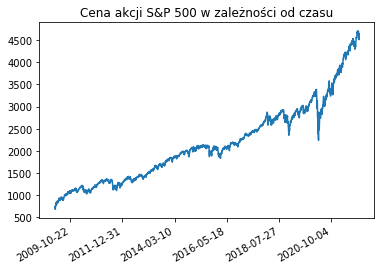

In [27]:
sp500 = take_data("SP500.csv", 1) #z datami na osi 0x
sp500_times = take_data("SP500.csv", 0)
times = [dt.datetime.strptime(data[:10],'%Y-%m-%d').date() for data in sp500_times[1250:]]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 800))
plt.plot(times, sp500[1250:])
plt.gcf().autofmt_xdate()
plt.title("Cena akcji S&P 500 w zależności od czasu")
plt.show()

W jaki sposób możemy opisać zmiany ceny równaniem? Spróbujmy wyjść z prostego modelu, który zakłada, że im wyższa cena akcji, tym szybciej będzie ona rosła. Niech $C(t)$ oznacza wartość ceny w czasie $t$, natomiast $w$ współczynnik wzrostu ceny:

$$\frac{\mathrm{d}C}{\mathrm{d}t} = Cw.$$

Dla uproszczenia obliczeń wygenerujmy wykres z liczbami zamiast dat:

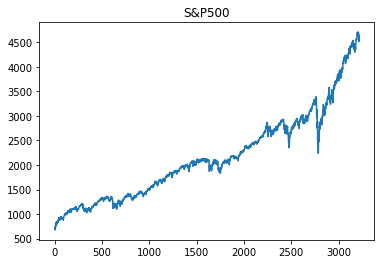

In [26]:
sp500 = take_data("SP500.csv", 1) #z liczbami na osi 0x
plt.title("S&P500")
plt.plot(sp500[1250:])
plt.show()

Odczytajmy z wykresu dwie wartości: $$C(0) = 735$$  $$C(3000) = 3787$$ a następnie rozwiążmy równanie.
$$\frac{\mathrm{d}C}{\mathrm{d}t} = Cw$$

$$\int \frac{\mathrm{d}C}{C} = w\int \mathrm{d}t$$

$$\mathrm{ln}(C) = wt + K$$

Z warunku $C(0) = 735$:

$$K = \mathrm{ln}(735) \approx 6,6 $$

Natomiast z warunku $C(3000) = 3787$:

$$w \approx 0,00054$$

Ostatecznie rozwiązaniem będzie:

$$ C(t) = e^{6,6}\cdot e^{0,00054t} $$

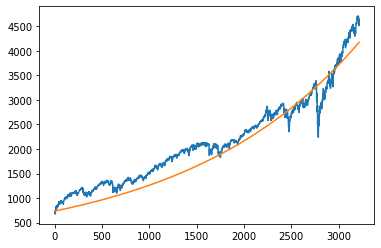

In [39]:
time = [t for t in range(0, 3216)]
solution = [math.exp(6.6)*math.exp(0.00054*t) for t in range(0, 3216)]
plt.plot(sp500[1250:])
plt.plot(time, solution)
plt.show()

Początkowo wykres całkiem dobrze odzwierciedla dynamikę zmiany cen akcji, jednak po $t = 3000$ tempo wzrostu jest zbyt niskie. Odczytajmy wartość $C$ dla $t = 3150$:
$$C(3150) = 4524$$ a następnie znajdźmy stałe $K$ oraz $w$ dla nowych warunków.

Z warunku $C(0) = 735$:

$$K = \mathrm{ln}(735) \approx 6,6 $$

Natomiast z warunku $C(3150) = 4524$:

$$w \approx 0,00056$$

Ostatecznie rozwiązaniem będzie:

$$ C(t) = e^{6,6}\cdot e^{0,00056t} $$

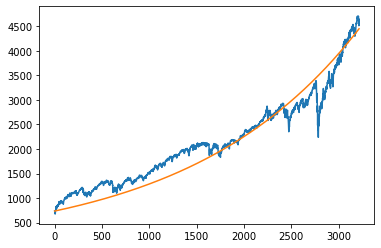

In [40]:
time = [t for t in range(0, 3216)]
solution = [math.exp(6.6)*math.exp(0.00056*t) for t in range(0, 3216)]
plt.plot(sp500[1250:])
plt.plot(time, solution)
plt.show()

Widać, że krzywa lepiej przybliża wykres cen akcji w późniejszym okresie, jednak mniej pokrywa się ze stanem sprzed roku 2016 (na wykresie będzie to wartość 1700). 

### IS3N
Przyjrzyjmy się wykresowi akcji IS3N. Zachowuje się on inaczej od wykresu cen S&P500 - można zauważyć, że w pewnym momencie wartość akcji zaczyna się stabilizować i przestaje rosnąć.

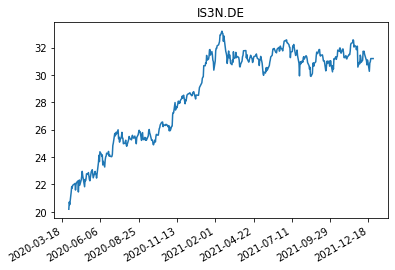

In [197]:
is3n_times = take_data("IS3N.DE.csv", 0)
times = [dt.datetime.strptime(data[:10],'%Y-%m-%d').date() for data in is3n_times[1350:]]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 80))
plt.plot(times, is3n[1350:])
plt.gcf().autofmt_xdate()
plt.title("IS3N.DE")
plt.show()

Można zatem spodziewać się, że dynamikę zmian dobrze przybliży równanie logarytmiczne, w którym pojemnością środowiskową będzie $k = 32$:

$$C'(t) = r\cdot C(t)\cdot(1- \frac{C(t)}{32})$$

Rozwiązaniem będzie:

$$C(t) = \frac{1}{\frac{1}{32} + (\frac{1}{C_0} - \frac{1}{32})e^{-rt}}$$

Aby odczytać dane z wykresu, wygenerujmy wykres z liczbami na osi $x$:

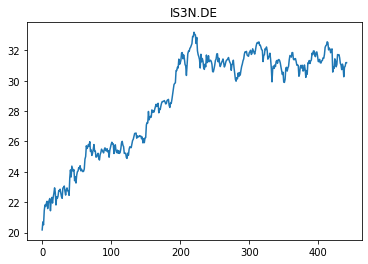

In [198]:
is3n = take_data("IS3N.DE.csv", 4)
for index in range(0, len(is3n)):
    if is3n[index] == 'null':
        is3n[index] = is3n[index - 1]
        
plt.title("IS3N.DE")
plt.plot(is3n[1350:])
plt.show()

I odczytajmy potrzebne dane; więcej niż dla dwóch punktów, aby otrzymać możliwie dokładny wynik:

$$C_0 = C(0) = 20,176001$$

$$C(180) = 25,848$$
$$C(50) = 23,77$$
$$C(100) = 25,812$$


Wyliczmy współczynnik $r$. Po przekształceniach dostaniemy, że:

$$r = \frac{\mathrm{ln}(\frac{C(K - C_0)}{C_0(K-C)})}{t}$$

Po podstawieniu znanych wartości dla $t = 50, 100, 180$ otrzymujemy:

$$r_1 = 0,01053,  r_2 = 0,00893,  r_3 = 0,005006$$

Po wyliczeniu średniej:

$$r = 0.00815$$ 

Mamy więc rozwiązanie postaci: 

$$C(t) = \frac{1}{\frac{1}{32} + 0,01831 \cdot e^{-0,00815t}}$$

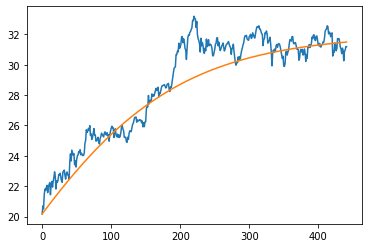

In [199]:
time = [t for t in range(0, 442)]
solution = [1/(1/32 + 0.01831 * math.exp(-0.00815*t)) for t in range(0, 442)]
plt.plot(is3n[1350:])
plt.plot(time, solution)
plt.show()

### Tesla

Przyjrzyjmy się wykresowi przedstawiającemu ceny akcji firmy Tesla:

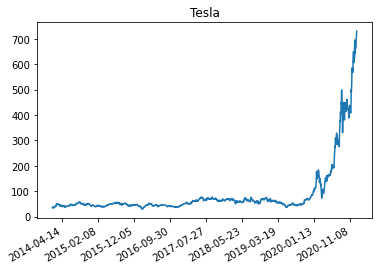

In [9]:
tesla = take_data("Tesla.csv", 1)
tesla_times = take_data("Tesla.csv", 0)
times = [dt.datetime.strptime(data[:10],'%Y-%m-%d').date() for data in tesla_times[:1750]]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 300))
plt.plot(times, tesla[:1750])
plt.gcf().autofmt_xdate()
plt.title("Tesla")
plt.show()

Wygląda on oryginalnie: przez kilka lat cena utrzymywała się na względnie stałym poziomie. Pod koniec 2019 roku zaczęła rosnąć, ale znacznie spadła w okolicach marca 2020 roku z powodu paniki związanej z rozpoczynającą się pandemią. To jednak tylko chwilowo zahamowało jej wzrost; po kilku miesiącach cena wzrastała w bardzo szybkim tempie. 

Spróbujmy przybliżyć dynamikę zmian cen akcji Tesli za pomocą prostego równania:

$$\frac{\mathrm{d}C}{\mathrm{d}t} = Cw.$$

Gdzie $C(t)$ oznacza cenę w czasie $t$, natomiast $w$ współczynnik wzrostu ceny.
Mamy więc:

$$\mathrm{ln}(C) = wt + K$$

Aby wyznaczyć współczynnik $w$ oraz stałą całkowania, potrzebujemy odczytać dwie wartości z wykresu. Zamieńmy więc daty na liczby reprezentujące czas:

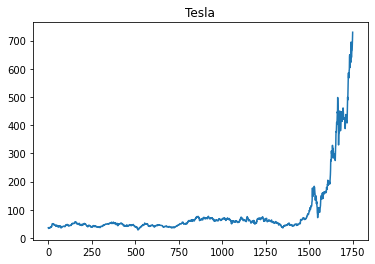

In [7]:
tesla = take_data("Tesla.csv", 1) #z liczbami na osi 0x
plt.title("Tesla")
plt.plot(tesla[:1750])
plt.show()

Odczytajmy dane dla $t=1400$ oraz dla $t=1750$:
$$C(1400) = 43,128$$
$$C(1750) = 735,11$$

Po podstawieniu do równania dostajemy:

$$w \approx 0,0081 $$
$$K \approx -7,5792 $$

Więc ostatecznie:

$$ C(t) = e^{-7,5792}\cdot e^{0,0081t} $$

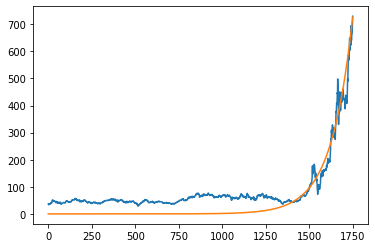

In [15]:
time = [t for t in range(0, 1750)]
solution = [math.exp(-7.5792)*math.exp(0.0081*t) for t in range(0, 1750)]
plt.plot(tesla[:1750])
plt.plot(time, solution)
plt.show()

Krzywa w dobry sposób odwzorowuje dynamikę zmian ceny akcji Tesli.

Jednak zobaczmy, co stało się z cenami Tesli w późniejszym czasie:

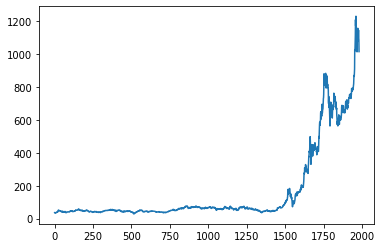

In [18]:
time = [t for t in range(0, 1982)]
plt.plot(tesla)
plt.show()

Akcje zaczęły gwałtownie spadać! Jeżeli spróbujemy porównać je z otrzymanym rozwiązaniem, otrzymamy:

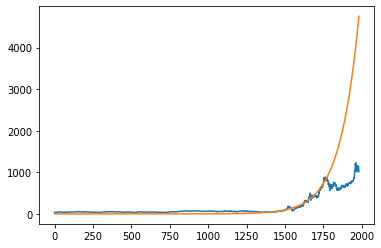

In [19]:
time = [t for t in range(0, 1982)]
solution = [math.exp(-7.5792)*math.exp(0.0081*t) for t in range(0, 1982)]
plt.plot(tesla)
plt.plot(time, solution)
plt.show()

Widać więc, że równanie było dobrze dopasowane do zachowania cen akcji Tesli tylko do pewnego momentu, ponieważ nie przewidziało nagłego spadku.

Dlaczego jednak nastąpił ten spadek? I czy moglibyśmy przewidzieć go metodą analityczną?

Okazuje się, że dużą rolę w zachowaniu rynku akcji odgrywają czynniki losowe. Nagłe spadki lub wzrosty moogą być spowodowane wybuchem pandemii, niestabilną sytuacją gospodarczą, zmianą zarządu w danej firmie lub nawet nieprzemyślaną wypowiedzią prezesa. Nie wszystko jesteśmy w stanie przewidzieć. 

### Regresja liniowa na przykładzie Forda
Spójrzmy na wykres cen akcji firmy Ford. 

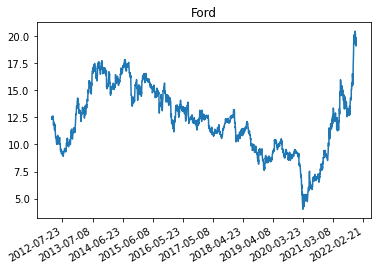

In [200]:
ford = take_data("Ford.csv", 1)
ford_times = take_data("Ford.csv", 0)
times = [dt.datetime.strptime(data[:10],'%Y-%m-%d').date() for data in ford_times]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 350))
plt.plot(times, ford)
plt.gcf().autofmt_xdate()
plt.title("Ford")
plt.show()

Ciężko dopatrzyć się tutaj reguły wzrostu lub spadku - największą rolę, jak się zdaje, odegrały czynniki losowe. Czy istnieje sposób, w jaki możemy odwzorować to zachowanie?

Można spodziewać się, że ceny akcji Forda są zależne od ogólnej kondycji sektora związanego z motoryzacją. Spójrzmy na wykresy pokrewnych firm dla takiego samego przedziału czasowego:

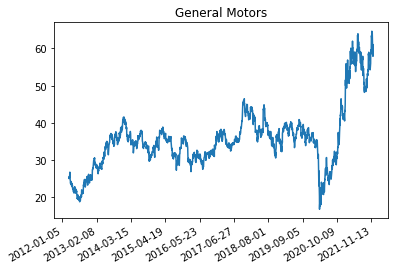

In [205]:
GM = take_data("GM.csv", 1)
GM_times = take_data("GM.csv", 0)
times = [dt.datetime.strptime(data[:10],'%Y-%m-%d').date() for data in GM_times[336:]]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 400))
plt.plot(times, GM[336:])
plt.gcf().autofmt_xdate()
plt.title("General Motors")
plt.show()

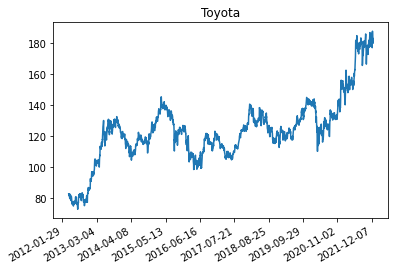

In [204]:
Toyota = take_data("Toyota_2.csv", 1)
Toyota_times = take_data("Toyota_2.csv", 0)
times = [dt.datetime.strptime(data[:10],'%Y-%m-%d').date() for data in Toyota_times[325:]]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 400))
plt.plot(times, Toyota[325:])
plt.gcf().autofmt_xdate()
plt.title("Toyota")
plt.show()

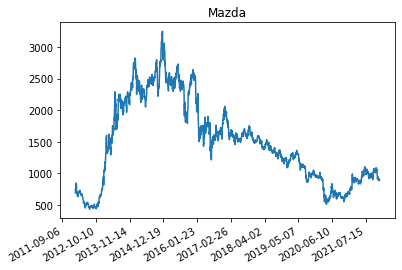

In [206]:
Mazda = take_data("Mazda.csv", 1)
Mazda_times = take_data("Mazda.csv", 0)
times = [dt.datetime.strptime(data[:10],'%Y-%m-%d').date() for data in Mazda_times[6:]]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 400))
plt.plot(times, Mazda[6:])
plt.gcf().autofmt_xdate()
plt.title("Mazda")
plt.show()

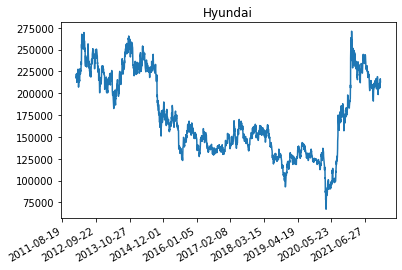

In [207]:
Hyundai = take_data("Hyundai.csv", 1)
Hyundai_times = take_data("Hyundai.csv", 0)
times = [dt.datetime.strptime(data[:10],'%Y-%m-%d').date() for data in Hyundai_times]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 400))
plt.plot(times, Hyundai)
plt.gcf().autofmt_xdate()
plt.title("Hyundai")
plt.show()

Na podstawie tych wykresów spróbujemy odwzorować zachowanie akcji Forda. Posłuży nam do tego regresja liniowa.

In [185]:
sp500 = take_data("SP500.csv", 1)
ford = take_data("Ford.csv", 1)
GM = take_data("GM.csv", 1)
Toyota_1 = take_data("Toyota_1.csv", 1)
Toyota_2 = take_data("Toyota_2.csv", 1)
Mazda = take_data("Mazda.csv", 1)
Hyundai = take_data("Hyundai.csv", 1)

sp500 = sp500[2022:]
GM= GM[336:]
Toyota_1 = Toyota_1[270:]
Toyota_2 = Toyota_2[325:]
Mazda = Mazda[6:]
Toyota_1 = Toyota_2

F = ford
delt = np.diff(np.log(F))
delt_sp500 = np.diff(np.log(sp500)) # zlogarytmowanie przytrosty!
delt_GM = np.diff(np.log(GM)) # zlogarytmowanie przytrosty!
delt_Toyota_2 = np.diff(np.log(Toyota_2))
delt_Toyota_1 = np.diff(np.log(Toyota_1))
delt_Hyundai = np.diff(np.log(Hyundai))
delt_Mazda = np.diff(np.log(Mazda))

def linear_regression_plot(cal, which_firms, array = False):
    if type(cal) != int or type(which_firms) != str or type(array) != bool:
        raise TypeError
        
    Y = delt[0:cal,]  # próbka pocz atkowa uzyta do trenowania regresji czyli do znalezienia bet w równianiu 1)
    Y_real = delt[cal:,]
    X0 = np.ones(np.shape(Y))
    
    if which_firms == "S&P500":
        X1 = delt_sp500[0:cal,]
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_sp500[cal:,] )],dtype=object).T
        X = np.array([X0,X1]).T
        
    elif which_firms == "GM":
        X1 = delt_GM[0:cal,]
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_GM[cal:,] )],dtype=object).T
        X = np.array([X0,X1]).T
        
    elif which_firms == "S&P500 & GM":
        X1 = delt_sp500[0:cal,] 
        X2 = delt_GM[0:cal,]    
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_sp500[cal:,] ),np.array(delt_GM[cal:,] )],dtype=object).T
        X = np.array([X0,X1,X2]).T
        
    elif which_firms == "Toyota & GM":
        X1 = delt_Toyota_1[0:cal,] 
        X2 = delt_GM[0:cal,] 
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_Toyota_1[cal:,]*30 ),np.array(delt_GM[cal:,] )],dtype=object).T
        X = np.array([X0,X1, X2]).T
    
    elif which_firms == "S&P500 & Toyota & GM":
        X1 = delt_Toyota_1[0:cal,] 
        X2 = delt_GM[0:cal,]
        X3 = delt_sp500[0:cal,]
    
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_sp500[cal:,] ),np.array(delt_Toyota_1[cal:,] ),np.array(delt_GM[cal:,] )],dtype=object).T
        X = np.array([X0,X1,X2,X3]).T 
        
    elif which_firms == "GM & Hyundai":
        X1 = delt_GM[0:cal,] 
        X2 = delt_Hyundai[0:cal,]
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_GM[cal:,]),np.array(delt_Hyundai[cal:,]*100 )],dtype=object).T
        X = np.array([X0,X1,X2]).T
        
    elif which_firms == "S&P500 & Hyundai & GM":
        X1 = delt_sp500[0:cal,]
        X2 = delt_Hyundai[0:cal,] 
        X3 = delt_GM[0:cal,]
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_sp500[cal:,] ),np.array(delt_Hyundai[cal:,] ),np.array(delt_GM[cal:,] )],dtype=object).T
        X = np.array([X0,X1,X2,X3]).T 
        
    elif which_firms == "Mazda":
        X1 = delt_Mazda[0:cal,]
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_Mazda[cal:,]*15 )],dtype=object).T
        X = np.array([X0,X1]).T
        
    elif which_firms == "Mazda & Huyndai":
        X1 = delt_Mazda[0:cal,] 
        X2 = delt_Hyundai[0:cal,]
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_Mazda[cal:,]),np.array(delt_Hyundai[cal:,]*100 )],dtype=object).T
        X = np.array([X0,X1,X2]).T
        
    elif which_firms == "Toyota & Mazda & Hyundai":
        X1 = delt_Toyota_1[0:cal,] 
        X2 = delt_Mazda[0:cal,] 
        X3 = delt_Hyundai[0:cal,]
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_Toyota_1[cal:,]*30 ),np.array(-delt_Mazda[cal:,] *30),np.array(delt_Hyundai[cal:,] *30)],dtype=object).T
        X = np.array([X0,X1,X2,X3]).T 
        
    elif which_firms == "Hyundai":
        X1 = delt_Hyundai[0:cal,]
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_Hyundai[cal:,] *105)],dtype=object).T
        X = np.array([X0,X1]).T
        
    elif which_firms == "Toyota":
        X1 = delt_Toyota_1[0:cal,]
        X_fut = np.array([np.array(np.ones(np.shape(Y_real))),np.array(delt_Toyota_1[cal:,] *30 )],dtype=object).T
        X = np.array([X0,X1]).T
        
    else:
        raise ValueError("No firm '%s'" % which_firms)
        
    Y = np.array(Y).reshape(-1,1)
    
    model = LinearRegression(fit_intercept = False)
    model.fit(X, Y)          # na podstawie równania - tu wchodza szystkie zmienne 
    
    betas = model.coef_  # współcznynniki rownania
    
    Y_fut = list(np.dot(X_fut,betas.T)) # prognozowane wartosci zmiennej
    
    if array:
        seperate_names = list(which_firms)
        headers = ["Wyraz wolny"]
        
        name = ''
        for letter in seperate_names:
            if letter != ' ':
                name += letter
            else:
                headers.append(name)
                name = ''
                
        if name != '':
            headers.append(name)
    
        for name in headers:
            if name == '&':
                headers.remove(name)
            
        table = tabulate(betas, headers, tablefmt="fancy_grid", numalign = "center", stralign = "center")
        print(table)

    forecasts = [F[cal]]
    for i in range(np.shape(Y_fut)[0]):
        forecasts.append(forecasts[i]*np.exp(float(Y_fut[i]))) # tylko początkowy punkt brany z prawdziwej ceny, resta wysymulowane
     
    plt.plot(forecasts, label = "Prognozowana cena")
    plt.plot(F[cal+1:], label = "Rzeczywista cena")
    plt.legend()
    plt.xlabel('Ceny akcji firmy Ford prognozowane na podstawie cen akcji %s' % which_firms)
    plt.show()

╒═══════════════╤══════════╕
│  Wyraz wolny  │  S&P500  │
╞═══════════════╪══════════╡
│ -0.000357553  │ 1.12997  │
╘═══════════════╧══════════╛


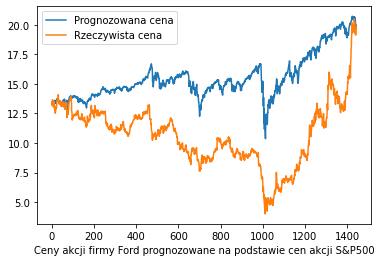

In [186]:
linear_regression_plot(1000, "S&P500", True)

╒═══════════════╤══════════╤══════════╕
│  Wyraz wolny  │  S&P500  │    GM    │
╞═══════════════╪══════════╪══════════╡
│ -0.000269622  │ 0.654763 │ 0.407078 │
╘═══════════════╧══════════╧══════════╛


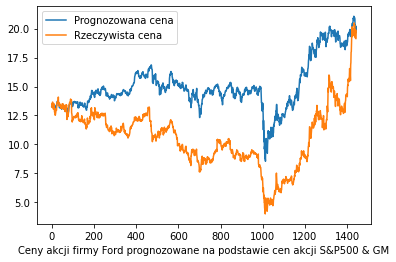

In [187]:
linear_regression_plot(1000, "S&P500 & GM", True)

╒═══════════════╤════════════╤══════════╕
│  Wyraz wolny  │   Toyota   │    GM    │
╞═══════════════╪════════════╪══════════╡
│ -7.37726e-05  │ 0.00368127 │ 0.607509 │
╘═══════════════╧════════════╧══════════╛


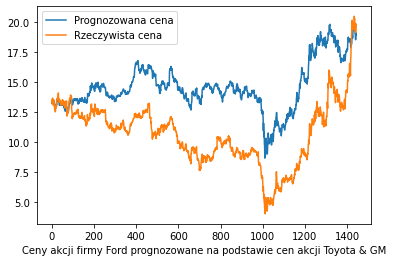

In [188]:
linear_regression_plot(1000, "Toyota & GM", True)

╒═══════════════╤══════════╤════════════╕
│  Wyraz wolny  │    GM    │  Hyundai   │
╞═══════════════╪══════════╪════════════╡
│ -6.99044e-05  │ 0.607541 │ 0.00698548 │
╘═══════════════╧══════════╧════════════╛


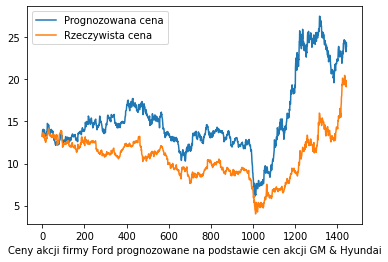

In [189]:
linear_regression_plot(1000, "GM & Hyundai", True)

╒═══════════════╤══════════╤═══════════╤══════════╕
│  Wyraz wolny  │  S&P500  │  Hyundai  │    GM    │
╞═══════════════╪══════════╪═══════════╪══════════╡
│  -0.00026569  │ 0.655015 │ 0.0090067 │ 0.406963 │
╘═══════════════╧══════════╧═══════════╧══════════╛


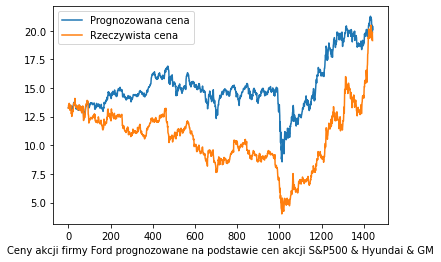

In [190]:
linear_regression_plot(1000, "S&P500 & Hyundai & GM", True)

╒═══════════════╤════════════╕
│  Wyraz wolny  │   Mazda    │
╞═══════════════╪════════════╡
│  7.63535e-05  │ -0.0244811 │
╘═══════════════╧════════════╛


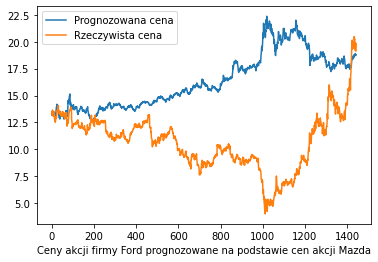

In [191]:
linear_regression_plot(1000, "Mazda", True)

╒═══════════════╤════════════╤════════════╕
│  Wyraz wolny  │   Mazda    │  Huyndai   │
╞═══════════════╪════════════╪════════════╡
│  8.06084e-05  │ -0.0246074 │ 0.00932277 │
╘═══════════════╧════════════╧════════════╛


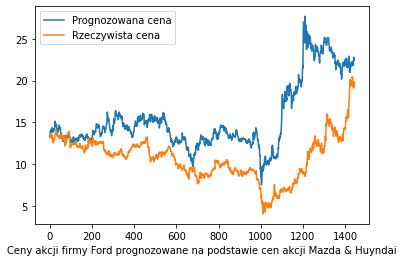

In [192]:
linear_regression_plot(1000, "Mazda & Huyndai", True)

╒═══════════════╤═══════════╤════════════╤═══════════╕
│  Wyraz wolny  │  Toyota   │   Mazda    │  Hyundai  │
╞═══════════════╪═══════════╪════════════╪═══════════╡
│  7.64561e-05  │ 0.0213426 │ -0.0244979 │ 0.0102791 │
╘═══════════════╧═══════════╧════════════╧═══════════╛


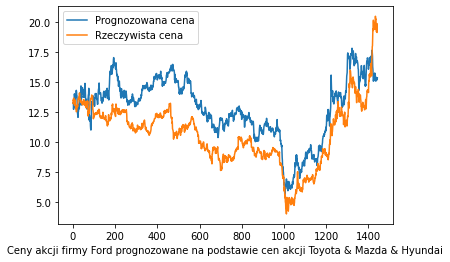

In [193]:
linear_regression_plot(1000, "Toyota & Mazda & Hyundai", True)

╒═══════════════╤═══════════╕
│  Wyraz wolny  │  Toyota   │
╞═══════════════╪═══════════╡
│  4.98142e-05  │ 0.0208697 │
╘═══════════════╧═══════════╛


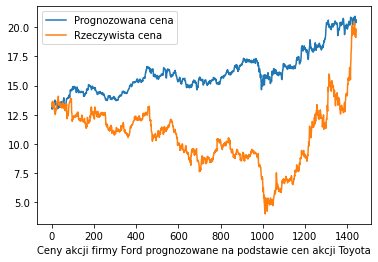

In [194]:
linear_regression_plot(1000, "Toyota", True)

╒═══════════════╤════════════╕
│  Wyraz wolny  │  Hyundai   │
╞═══════════════╪════════════╡
│  5.80376e-05  │ 0.00865675 │
╘═══════════════╧════════════╛


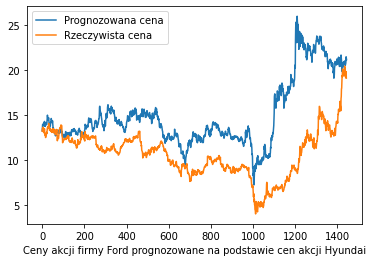

In [195]:
linear_regression_plot(1000, "Hyundai", True)